<a href="https://colab.research.google.com/github/almachn/uas-prep-pengolahan-citra/blob/main/DETEKSI_AREA_KERUSAKAN_PADA_CITRA_TERUMBU_KARANG_AKIBAT_CORAL_BLEACHING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Import Libary**
* cv2: OpenCV digunakan untuk pemrosesan gambar.
* numpy: digunakan untuk manipulasi array dan perhitungan.
matplotlib.
* pyplot: digunakan untuk visualisasi hasil gambar.
* os: untuk berinteraksi dengan file dan folder.
pandas: digunakan untuk menyimpan hasil analisis dalam format CSV.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

###**Mendeteksi _Coral Bleaching_ pada gambar**

Gambar dikonversi dari format RGB ke HSV (Hue, Saturation, Value) karena warna putih lebih mudah terdeteksi di ruang warna ini. Fungsi cv2.inRange() digunakan untuk membuat mask yang menandai area putih (coral bleaching) pada gambar.

In [ ]:
def detect_white_areas(image_rgb):
    # Konversi gambar RGB ke HSV
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    # Rentang nilai untuk mendeteksi warna putih
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([180, 50, 255])

    # Masking untuk mendeteksi area putih
    mask_white = cv2.inRange(image_hsv, lower_white, upper_white)
    return mask_white

###**Operasi Morfologi _(Cleaning Noise)_**

Melakukan operasi morfologi untuk membersihkan noise kecil pada mask biner. Operasi closing dan opening dilakukan untuk mengurangi gangguan kecil di mask dan menjaga area bleaching yang sebenarnya

In [ ]:
def morphological_operations(binary_image):
    kernel = np.ones((5, 5), np.uint8)
    cleaned = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
    cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_OPEN, kernel)
    return cleaned

###**Menghitung Persentase _Coral Bleaching_**

Menghitung persentase area coral bleaching pada gambar. Dengan menghitung jumlah pixel yang bernilai 255 (white) pada gambar biner, kemudian membandingkan dengan jumlah total pixel di gambar.

In [ ]:
def calculate_bleaching_percentage(binary_image):
    total_pixels = binary_image.size
    bleaching_pixels = np.sum(binary_image == 255)
    percentage = (bleaching_pixels / total_pixels) * 100
    return percentage

###**Memproses Setiap Gambar**

1. Gambar dibaca dan dikonversi ke format RGB.
2. Masking dilakukan untuk mendeteksi area coral bleaching.
3. Operasi morfologi diterapkan untuk membersihkan mask.
4. Persentase bleaching dihitung.

Sehingga fungsi ini mengembalikan nilai persentase bleaching, gambar RGB, mask biner bleaching, dan gambar hasil morfologi.

In [ ]:
def process_coral_image(image_path):
    # Baca dan konversi gambar ke RGB
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Deteksi area putih (coral bleaching)
    mask_white = detect_white_areas(image_rgb)

    # Operasi morfologi untuk membersihkan noise
    morphed_image = morphological_operations(mask_white)

    # Hitung persentase area bleaching
    bleaching_percentage = calculate_bleaching_percentage(morphed_image)

    return bleaching_percentage, image_rgb, mask_white, morphed_image

###**Memproses Seluruh Dataset**

**Mengambil Semua File Gambar dengan Ekstensi .jpg dalam Folder Dataset**

Langkah pertama yang dilakukan adalah mengambil semua file gambar dengan ekstensi .jpg yang ada di dalam folder dataset yang telah ditentukan. Program memeriksa folder yang diberikan dan memfilter hanya file-file dengan ekstensi .jpg menggunakan fungsi os.listdir(). Hanya gambar-gambar dengan ekstensi ini yang akan diproses, memastikan bahwa dataset yang dianalisis terdiri dari gambar-gambar yang sesuai.

**Memproses Setiap Gambar Menggunakan Fungsi process_coral_image()**

Setelah memperoleh daftar gambar dengan ekstensi .jpg, program kemudian memproses setiap gambar satu per satu. Setiap gambar diproses dengan menggunakan fungsi process_coral_image(). Fungsi ini melakukan beberapa langkah penting untuk menganalisis gambar:

* **Baca dan konversi gambar:** Gambar yang dibaca dalam format BGR oleh OpenCV kemudian dikonversi ke format RGB untuk memudahkan pemrosesan lebih lanjut.
* **Deteksi coral bleaching:** Fungsi mendeteksi area putih yang menunjukkan terjadinya coral bleaching menggunakan teknik konversi warna ke ruang warna HSV dan kemudian menerapkan thresholding untuk menandai area putih.
* **Pembersihan dengan operasi morfologi:** Operasi morfologi (seperti closing dan opening) digunakan untuk membersihkan noise dalam hasil mask, sehingga hanya area bleaching yang tetap terdeteksi dengan jelas.
* **Penghitungan persentase bleaching:** Persentase area bleaching dihitung dengan membandingkan jumlah pixel yang terdeteksi sebagai putih (bleaching) terhadap total jumlah pixel pada gambar.

**Menyimpan Hasil Persentase Bleaching dalam List results dan Visualisasi Setiap Gambar**

Setelah setiap gambar diproses, program menyimpan hasilnya, termasuk persentase coral bleaching yang terdeteksi, dalam sebuah list bernama results. Di dalam list ini, setiap gambar disertakan dengan nama file gambar dan persentase bleaching yang terdeteksi, yang disimpan dalam bentuk dictionary.

Selain itu, program juga menghasilkan visualisasi untuk setiap gambar yang diproses. Menggunakan matplotlib, program menampilkan tiga visualisasi utama untuk setiap gambar:

* **Citra input RGB:** Gambar asli dalam format RGB.
* **Mask area bleaching:** Gambar biner yang menunjukkan area yang terdeteksi sebagai bleaching.
* **Citra hasil morfologi:** Gambar yang telah melalui proses pembersihan untuk menghilangkan noise dan menampilkan area bleaching yang lebih jelas.


In [ ]:
def process_dataset(dataset_path):
    image_files = [f for f in os.listdir(dataset_path) if f.endswith('.jpg')]

    results = []

    for image_file in image_files:
        image_path = os.path.join(dataset_path, image_file)

        bleaching_percentage, image_rgb, mask_white, morphed_image = process_coral_image(image_path)

        results.append({
            'Image': image_file,
            'Bleaching Percentage': bleaching_percentage
        })

        # Tampilkan hasil untuk setiap gambar
        plt.figure(figsize=(12, 8))
        plt.subplot(2, 2, 1)
        plt.title(f'Citra Input (RGB) - {image_file}')
        plt.imshow(image_rgb)
        plt.axis('off')

        plt.subplot(2, 2, 2)
        plt.title('Mask Area Bleaching')
        plt.imshow(mask_white, cmap='gray')
        plt.axis('off')

        plt.subplot(2, 2, 3)
        plt.title('Citra Hasil Morfologi')
        plt.imshow(morphed_image, cmap='gray')
        plt.axis('off')

        plt.suptitle(f'Persentase Area Coral Bleaching: {bleaching_percentage:.2f}%', fontsize=16)
        plt.show()

###**Menjalankan Proses Dataset**

Menentukan path folder yang berisi gambar dataset dan menjalankan fungsi process_dataset() untuk memproses semua gambar dalam folder tersebut.

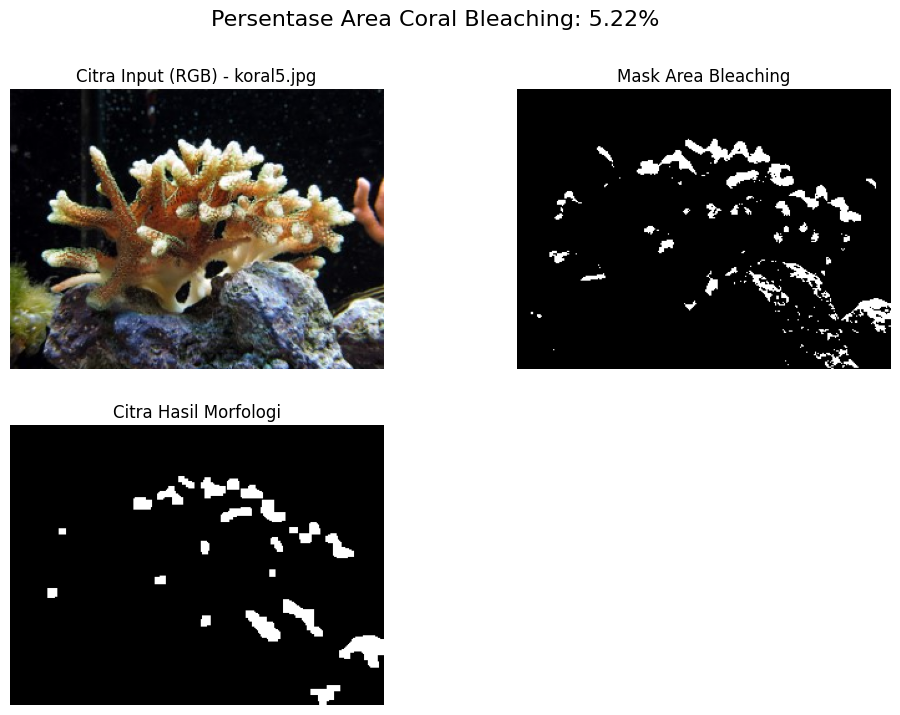

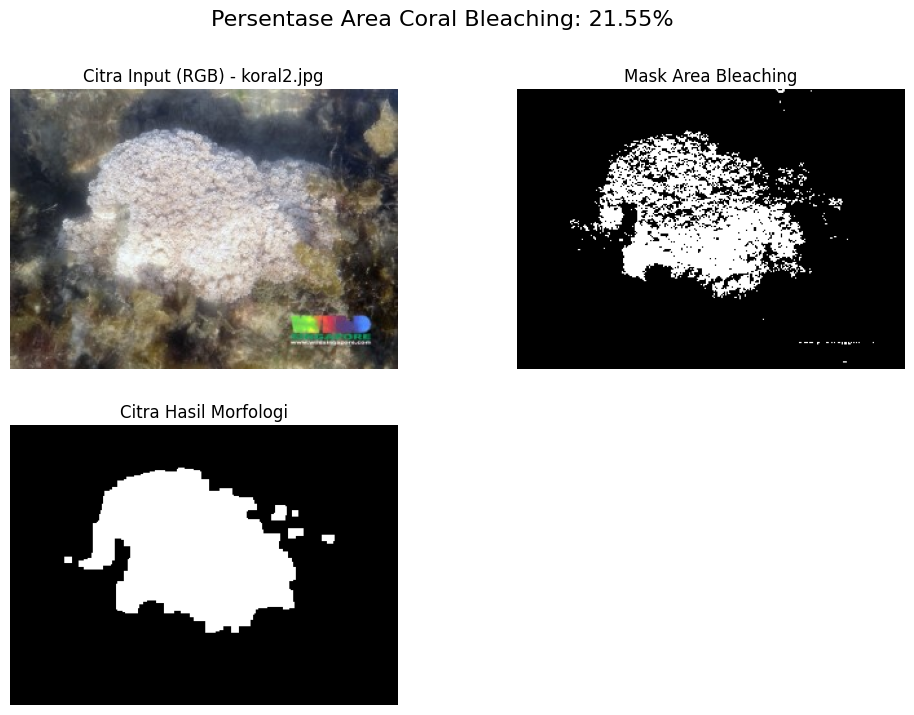

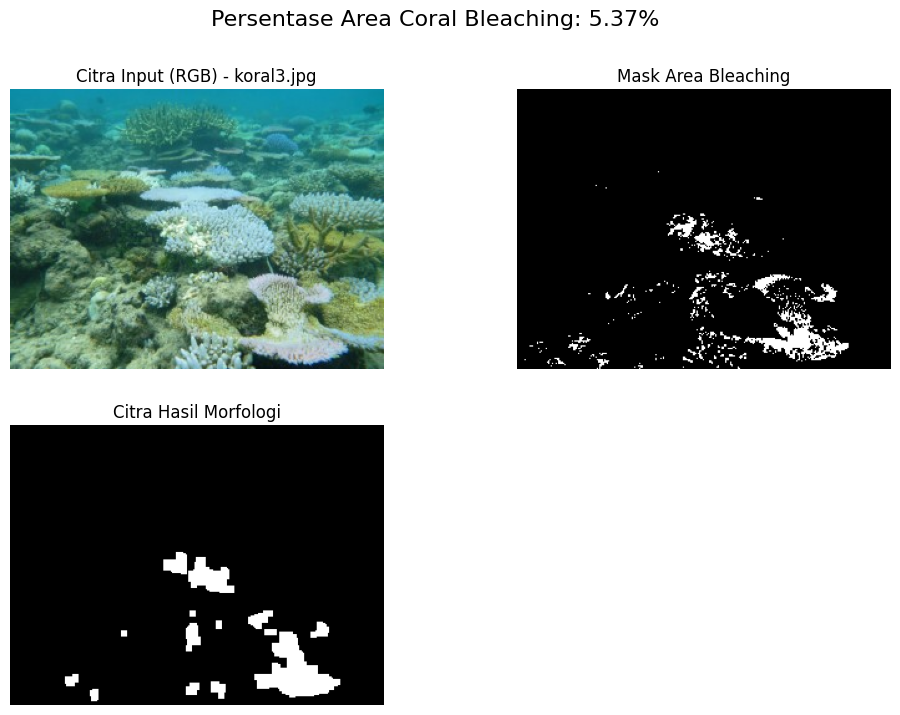

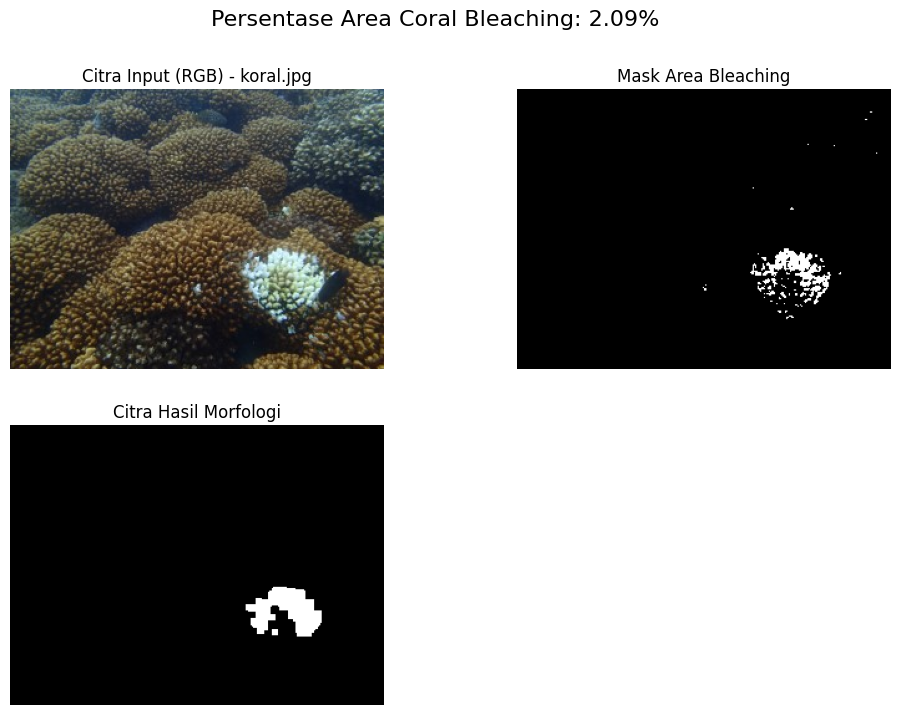

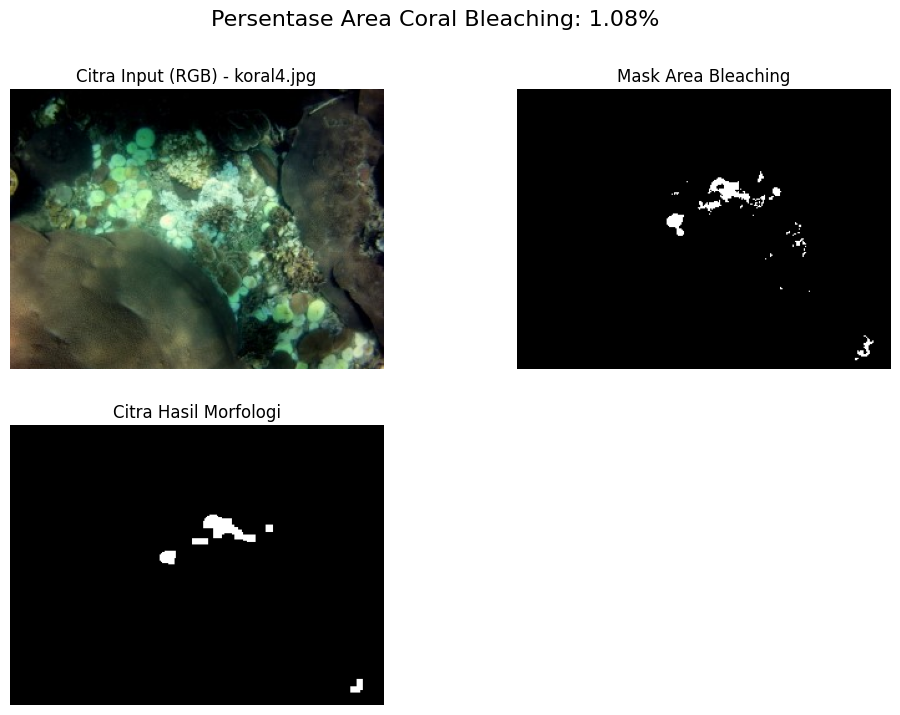

In [9]:
dataset_path = '/content/dataset'
process_dataset(dataset_path)